In [1]:
import json
import matplotlib.pyplot as plt
import datetime

# Bestimmt welche Ergebnisse ausgewertet werden
# 45 oder 55
useDatasetSize = 55
# 10 oder 25
numberRuns = 10

"""
Lädt Ergebnissedatei
"""
def loadData():
    results = None
    with open('./EvalModels/ModellOverview_{}CVs_{}Runs.jsonl'.format(useDatasetSize, numberRuns), 'r', encoding="utf-8") as f:
        for cv in f:
            results = json.loads(cv) 
    return results['Modelle']

    
"""
Speichert alle Ergebnisse in Arrays
Man könnte die Performance verbessern, indem man nicht in jeder Funktion durch aller Ergebnisse loopt, 
 sondern die Funktionen in einer for-Schleife aufrufen würde.
 Das wäre aber vmtl etwas schlechter lesbar, deshalb hab ich es so gemacht.
"""
def getResults(results):
    fScores    = [[],[],[],[],[],[],[],[],[],[]]
    precisions = [[],[],[],[],[],[],[],[],[],[]]
    recalls    = [[],[],[],[],[],[],[],[],[],[]]
    for result in results:
        # packt Ergebnisse in verschachtelte Arrays
        # Position (index) abhängig von Evaluationsdatenmenge (evalSize)
        evalSize  = result['evalSize']
        index     = int(evalSize/2 - 1)
        fScores[index].append(result['evaluation']['f_score'])
        precisions[index].append(result['evaluation']['precision'])
        recalls[index].append(result['evaluation']['recall'])
    return fScores, precisions, recalls
 
"""
Berechnet durchschnittliche Werte
"""
def getAverages(fScores, precisions, recalls): 
    averageFScores    = [0,0,0,0,0,0,0,0,0,0]
    averagePrecisions = [0,0,0,0,0,0,0,0,0,0]
    averageRecalls    = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            averageFScores[i]    = averageFScores[i] + fScores[i][j]
            averagePrecisions[i] = averagePrecisions[i] + precisions[i][j]
            averageRecalls[i]    = averageRecalls[i] + recalls[i][j]
        averageFScores[i]    = averageFScores[i] / len(fScores[i])
        averagePrecisions[i] = averagePrecisions[i] / len(fScores[i])
        averageRecalls[i]    = averageRecalls[i] / len(fScores[i])
    return averageFScores, averagePrecisions, averageRecalls
 
"""
Ermittelt maximale Werte
"""
def getMax(fScores, precisions, recalls): 
    maxFScores    = [0,0,0,0,0,0,0,0,0,0]
    maxPrecisions = [0,0,0,0,0,0,0,0,0,0]
    maxRecalls    = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            if fScores[i][j] > maxFScores[i]:
                maxFScores[i] = fScores[i][j]
            if precisions[i][j] > maxPrecisions[i]:
                maxPrecisions[i] = precisions[i][j]
            if recalls[i][j] > maxRecalls[i]:
                maxRecalls[i] = recalls[i][j]
    return maxFScores, maxPrecisions, maxRecalls

"""
Ermittelt minimale Werte
"""
def getMin(fScores, precisions, recalls): 
    minFScores    = [1,1,1,1,1,1,1,1,1,1]
    minPrecisions = [1,1,1,1,1,1,1,1,1,1]
    minRecalls    = [1,1,1,1,1,1,1,1,1,1]
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            if fScores[i][j] < minFScores[i]:
                minFScores[i] = fScores[i][j]
            if precisions[i][j] < minPrecisions[i]:
                minPrecisions[i] = precisions[i][j]
            if recalls[i][j] < minRecalls[i]:
                minRecalls[i] = recalls[i][j]
    return minFScores, minPrecisions, minRecalls

"""
Ermittelt Median
"""
def getMedian(fScores, precisions, recalls): 
    mediansFScores    = []
    mediansPrecisions = []
    mediansRecalls    = []
    for i in range(len(fScores)):
        fScores[i].sort()
        precisions[i].sort()
        recalls[i].sort()
        index1 = int(len(fScores[i]) / 2) - 1
        index2 = int(len(fScores[i]) / 2) - 2
        mediansFScores.append((fScores[i][index1] + fScores[i][index2]) / 2)
        mediansPrecisions.append((precisions[i][index1] + precisions[i][index2]) / 2)
        mediansRecalls.append((recalls[i][index1] + recalls[i][index2]) / 2)
    return mediansFScores, mediansPrecisions, mediansRecalls

"""
Ermittelt Varianz/Standardabweichung
"""
def getVarianz(fScores, precisions, recalls): 
    varianzFScores    = [0,0,0,0,0,0,0,0,0,0]
    varianzPrecisions = [0,0,0,0,0,0,0,0,0,0]
    varianzRecalls    = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(fScores)):
        for j in range(len(fScores[i])):
            varianzFScores[i]    = varianzFScores[i] + (fScores[i][j] - averageFScores[i])**2 * (1/len(fScores[i]))
            varianzPrecisions[i] = varianzPrecisions[i] + (precisions[i][j] - averagePrecisions[i])**2 * (1/len(fScores[i]))
            varianzRecalls[i]    = varianzRecalls[i] + (recalls[i][j] - averageRecalls[i])**2 * (1/len(fScores[i]))
    return varianzFScores, varianzPrecisions, varianzRecalls

"""
Ermittelt Dauer der Trainings- und Evaluationsvorgänge
"""
def getDuration(results):
    duration = datetime.timedelta(hours=0, minutes=0, seconds=0, microseconds=0)
    i = 0
    for result in results:
        if (i % 100 == 0):
            durationTrain = datetime.datetime.strptime(result['durationTrain'], "%H:%M:%S.%f").time()
            TrainTimedelta = datetime.timedelta(hours=durationTrain.hour, minutes=durationTrain.minute, seconds=durationTrain.second, microseconds=durationTrain.microsecond)
            duration = duration + TrainTimedelta
        durationEval = datetime.datetime.strptime(result['durationEval'], "%H:%M:%S.%f").time()
        EvalTimedelta = datetime.timedelta(hours=durationEval.hour, minutes=durationEval.minute, seconds=durationEval.second, microseconds=durationEval.microsecond)
        duration = duration + EvalTimedelta
        i = i+1
    return duration


results = loadData()
fScores, precisions, recalls = getResults(results)
duration = getDuration(results)
print("Laufzeit:", duration)

#berechnet alle entsprechenden Werte und gibt sie in Arrays zurück
averageFScores, averagePrecisions, averageRecalls = getAverages(fScores, precisions, recalls)
maxFScores, maxPrecisions, maxRecalls             = getMax(fScores, precisions, recalls)
minFScores, minPrecisions, minRecalls             = getMin(fScores, precisions, recalls)
mediansFScores, mediansPrecisions, mediansRecalls = getMedian(fScores, precisions, recalls)
varianzFScores, varianzPrecisions, varianzRecalls = getVarianz(fScores, precisions, recalls)


Laufzeit: 1:17:20.643359


In [4]:
# Printet die Ergebnisse. 
# Gibt zwei mögliche Darstellungsweisen (printEvalSizeWise und printMetricWise)

printEvalSizeWise =  False
printMetricWise = True
print("  \t \t average\tvarianz\t\t  max\t\t  min")
if printEvalSizeWise:
    for i in range(len(fScores)):
        print("evalSize:", ((i+1)*2))
        print("  F-Score:    ", averageFScores[i], "\t", mediansFScores[i], "\t", maxFScores[i], "\t", minFScores[i])
        print("  Precision:  ", averagePrecisions[i], "\t", mediansPrecisions[i], "\t", maxPrecisions[i], "\t", minPrecisions[i])
        print("  Recall:     ", averageRecalls[i], "\t", mediansRecalls[i], "\t", maxRecalls[i], "\t", minRecalls[i])
if printMetricWise:
    print("F-Scores:")
    for i in range(len(fScores)):
        if ((i+1)*2) < 10:
            print(" evalSize:  ", ((i+1)*2), "\t", round(averageFScores[i],4), "\t", round(mediansFScores[i],4), "\t", round(maxFScores[i],4), "\t", round(minFScores[i],4))
        else:
            print(" evalSize: ", ((i+1)*2), "\t", round(averageFScores[i],4), "\t", round(mediansFScores[i],4), "\t", round(maxFScores[i],4), "\t", round(minFScores[i],4))
        
    print("\nPrecisions:")
    for i in range(len(fScores)):
        if ((i+1)*2) < 10:
            print(" evalSize:  ", ((i+1)*2), "\t", round(averagePrecisions[i],4), "\t", round(mediansPrecisions[i],4), "\t", round(maxPrecisions[i],4), "\t", round(minPrecisions[i],4))
        else:
            print(" evalSize: ", ((i+1)*2), "\t", round(averagePrecisions[i],4), "\t", round(mediansPrecisions[i],4), "\t", round(maxPrecisions[i],4), "\t", round(minPrecisions[i],4))
        
    print("\nRecalls:")
    for i in range(len(fScores)):
        if ((i+1)*2) < 10:
            print(" evalSize:  ", ((i+1)*2), "\t", round(averageRecalls[i],4), "\t", round(mediansRecalls[i],4), "\t", round(maxRecalls[i],4), "\t", round(minRecalls[i],4))
        else:
            print(" evalSize: ", ((i+1)*2), "\t", round(averageRecalls[i],4), "\t", round(mediansRecalls[i],4), "\t", round(maxRecalls[i],4), "\t", round(minRecalls[i],4))
        

  	 	 average	varianz		  max		  min
F-Scores:
 evalSize:   2 	 0.7357 	 0.7386 	 0.8485 	 0.5597
 evalSize:   4 	 0.7323 	 0.7364 	 0.8426 	 0.6049
 evalSize:   6 	 0.7269 	 0.7322 	 0.8129 	 0.6262
 evalSize:   8 	 0.733 	 0.7345 	 0.7991 	 0.6417
 evalSize:  10 	 0.7273 	 0.7304 	 0.7862 	 0.6546
 evalSize:  12 	 0.7246 	 0.7281 	 0.7759 	 0.6545
 evalSize:  14 	 0.7298 	 0.729 	 0.7873 	 0.6587
 evalSize:  16 	 0.731 	 0.7326 	 0.7682 	 0.6802
 evalSize:  18 	 0.7281 	 0.7272 	 0.7667 	 0.6808
 evalSize:  20 	 0.7277 	 0.7266 	 0.7628 	 0.6956

Precisions:
 evalSize:   2 	 0.7503 	 0.7548 	 0.8555 	 0.6152
 evalSize:   4 	 0.7425 	 0.7384 	 0.8523 	 0.5978
 evalSize:   6 	 0.7388 	 0.7408 	 0.8062 	 0.6588
 evalSize:   8 	 0.7435 	 0.7461 	 0.813 	 0.6633
 evalSize:  10 	 0.7399 	 0.7394 	 0.7942 	 0.676
 evalSize:  12 	 0.7369 	 0.7379 	 0.7948 	 0.6715
 evalSize:  14 	 0.7423 	 0.7412 	 0.8084 	 0.6732
 evalSize:  16 	 0.7429 	 0.7438 	 0.7897 	 0.6901
 evalSize:  18 	 0.7402 	 0.

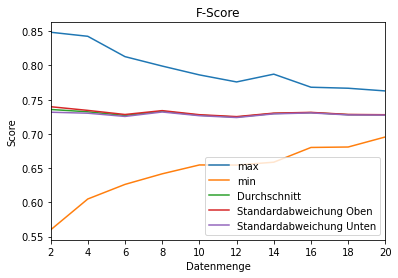

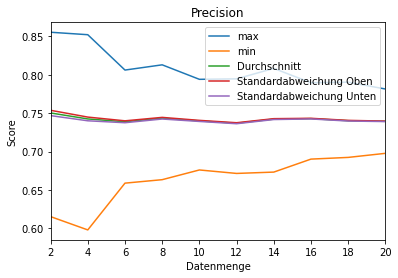

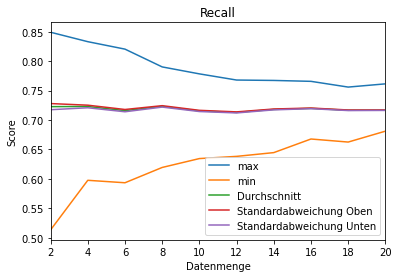

In [5]:
# Min-Max-Werte und Durchschnittswerte inkl. Standardabweichungen

xWerte = [2,4,6,8,10,12,14,16,18,20]
varianzPlusFScore = []
varianzMinusFScore = []
varianzPlusPrecision = []
varianzMinusPrecision = []
varianzPlusRecall = []
varianzMinusRecall = []
for i in range(len(fScores)):
    varianzPlusFScore.append(averageFScores[i] + varianzFScores[i])
    varianzMinusFScore.append(averageFScores[i] - varianzFScores[i])
    varianzPlusPrecision.append(averagePrecisions[i] + varianzPrecisions[i])
    varianzMinusPrecision.append(averagePrecisions[i] - varianzPrecisions[i])
    varianzPlusRecall.append(averageRecalls[i] + varianzRecalls[i])
    varianzMinusRecall.append(averageRecalls[i] - varianzRecalls[i])
      
plt.title('F-Score')
plt.plot(xWerte,maxFScores, label="max")
plt.plot(xWerte,minFScores, label="min")
plt.plot(xWerte,averageFScores, label="Durchschnitt")
plt.plot(xWerte,varianzPlusFScore, label="Standardabweichung Oben")
plt.plot(xWerte,varianzMinusFScore, label="Standardabweichung Unten")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Precision')
plt.plot(xWerte,maxPrecisions, label="max")
plt.plot(xWerte,minPrecisions, label="min")
plt.plot(xWerte,averagePrecisions, label="Durchschnitt")
plt.plot(xWerte,varianzPlusPrecision, label="Standardabweichung Oben")
plt.plot(xWerte,varianzMinusPrecision, label="Standardabweichung Unten")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Recall')
plt.plot(xWerte,maxRecalls, label="max")
plt.plot(xWerte,minRecalls, label="min")
plt.plot(xWerte,averageRecalls, label="Durchschnitt")
plt.plot(xWerte,varianzPlusRecall, label="Standardabweichung Oben")
plt.plot(xWerte,varianzMinusRecall, label="Standardabweichung Unten")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

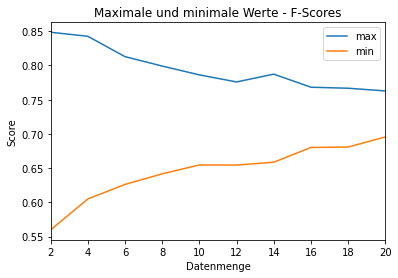

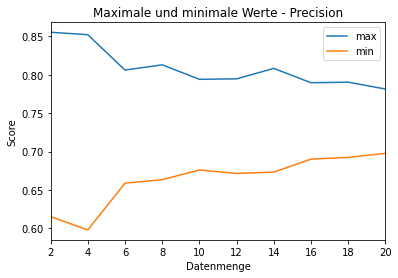

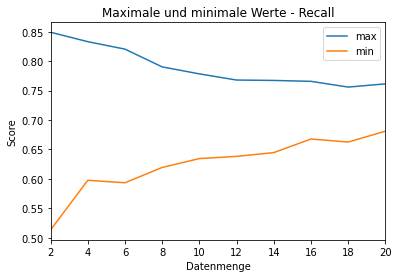

In [6]:
# Min-Max-Werte

xWerte = [2,4,6,8,10,12,14,16,18,20]

plt.title('Maximale und minimale Werte - F-Scores')
plt.plot(xWerte,maxFScores, label="max")
plt.plot(xWerte,minFScores, label="min")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Maximale und minimale Werte - Precision')
plt.plot(xWerte,maxPrecisions, label="max")
plt.plot(xWerte,minPrecisions, label="min")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Maximale und minimale Werte - Recall')
plt.plot(xWerte,maxRecalls, label="max")
plt.plot(xWerte,minRecalls, label="min")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

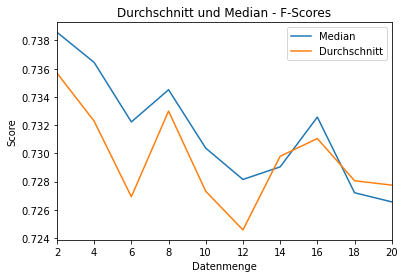

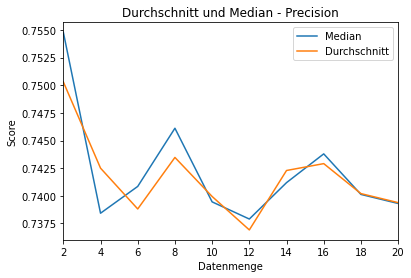

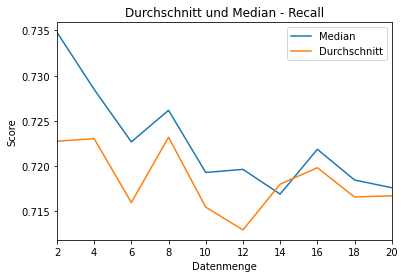

In [7]:
# Median und Durchschnittswerte 

xWerte = [2,4,6,8,10,12,14,16,18,20]

plt.title('Durchschnitt und Median - F-Scores')
plt.plot(xWerte,mediansFScores, label="Median")
plt.plot(xWerte,averageFScores, label="Durchschnitt")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Durchschnitt und Median - Precision')
plt.plot(xWerte,mediansPrecisions, label="Median")
plt.plot(xWerte,averagePrecisions, label="Durchschnitt")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Durchschnitt und Median - Recall')
plt.plot(xWerte,mediansRecalls, label="Median")
plt.plot(xWerte,averageRecalls, label="Durchschnitt")
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.legend()
plt.show()

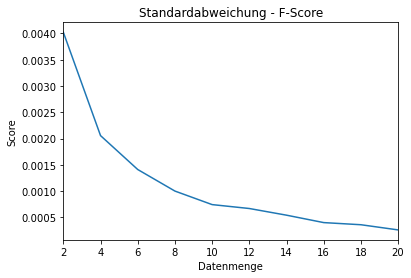

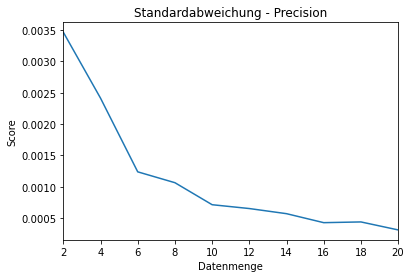

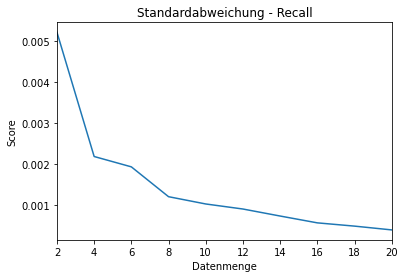

In [9]:
# Standardabweichung

xWerte = [2,4,6,8,10,12,14,16,18,20]

plt.title('Standardabweichung - F-Score')
plt.plot(xWerte,varianzFScores)
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

plt.title('Standardabweichung - Precision')
plt.plot(xWerte,varianzPrecisions)
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

plt.title('Standardabweichung - Recall')
plt.plot(xWerte,varianzRecalls)
plt.xlim(2,20)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()


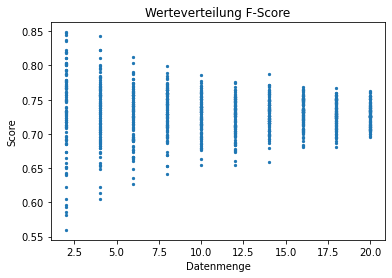

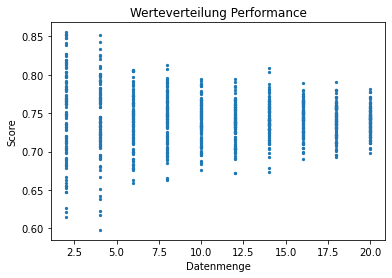

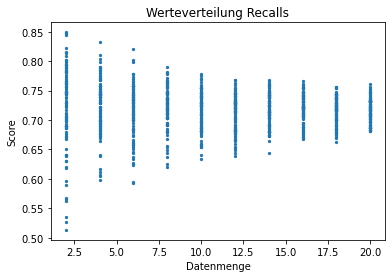

In [10]:
#Werteverteilungen

x = []
yf = []
yp = []
yr = []
for i in range(len(fScores)):
    for j in range(len(fScores[i])):
        x.append((i+1)*2)
        yf.append(fScores[i][j])
        yp.append(precisions[i][j])
        yr.append(recalls[i][j])

plt.title('Werteverteilung F-Score')
plt.scatter(x, yf, s=5)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()


plt.title('Werteverteilung Performance')
plt.scatter(x, yp, s=5)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()

plt.title('Werteverteilung Recalls')
plt.scatter(x, yr, s=5)
plt.xlabel('Datenmenge')
plt.ylabel('Score')
plt.show()